# Assignment 4 - Tashlin Reddy
- Download  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# Digit learning challenge
- Use the methods taught in the course, or a good combination of the methods taught in the course to predict all 10 digits of the zipcode data. Only use ziptrain.csv data to build your model, and evaluate the accuracy of your model on ziptest.csv 

- Your codes must be reproducible. We may run your codes on ziptrain.csv data on our own machine. 

# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


First let's import our basic dependencies and load our data from the source

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#load data from url
ztrain = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptrain.csv")
ztest = np.loadtxt("https://raw.githubusercontent.com/vahidpartovinia/ycbs255/master/jupyter/data/ziptest.csv")

In [3]:
ztrain.shape

(7291, 257)

Our data is split into train and test already, but we want to seperate the labels and features of both datasets as well

In [4]:
y_train = ztrain[:,0]
X_train = ztrain[:,1:]
y_test = ztest[:,0]
X_test = ztest[:,1:]



##### Quick Exploratory Analysis
- most was done in the previous assignment

Let's plot the training data and the testing data to see if there are major distribution differences that might influence the fit and predictive power of our model.

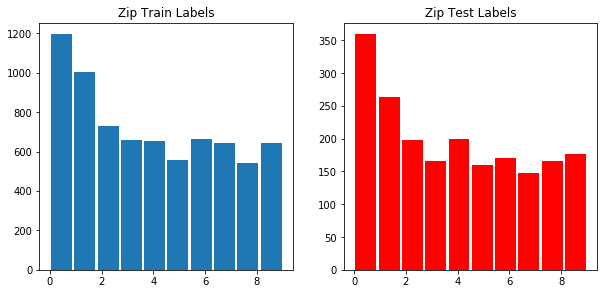

In [5]:
plt.figure(figsize = (10,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax1.hist(y_train, rwidth = 0.9, bins = 10);
ax1.set_title('Zip Train Labels');
ax2.hist(y_test, rwidth = 0.9, color = 'red', bins = 10)
ax2.set_title("Zip Test Labels")
plt.show()

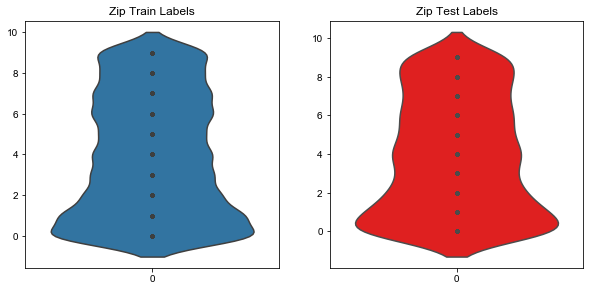

In [6]:
plt.figure(figsize = (10,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
sns.set_style("darkgrid")
sns.violinplot(data = y_train, inner="points", ax = ax1)
sns.violinplot(data = y_test, inner = 'points', color = 'red', ax = ax2)
ax1.set_title('Zip Train Labels');
ax2.set_title('Zip Test Labels');

#### From the plots we can see that the digit Zero is much more common than the rest in both the train and test sets followed by the digit One. The rest of the digits are more or less close to similar frequencies. 
#### A possible reason for this might be stipulations for how the US delegates zipcode numbers and therefore there are more Zeros and Ones. This shouldn't effect our prediction too much seeing how both the train and test sets have similar trends. Although it might be a consideration down the line. 


### Predictive modeling

As a benchmark, in assignment #3, linear discriminant analysis was the best predictor without PCA. An accuracy score of 0.8854 was attained. Meaning 88.54% of all predictions were correct. Let's see how much we can improve this. 

#### We'll try Multilayer Perceptron classifier first. 

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nn_acc_list = []
for i in range(10,150,10):
    for j in range(10,150,10):
        nn = MLPClassifier(hidden_layer_sizes = (i,j), activation='relu')
        nn.fit(X_train, y_train)
        nn_acc_list.append(accuracy_score(nn.predict(X_test), y_test))
        print(i, j, accuracy_score(nn.predict(X_test), y_test))
    


10 10 0.9172894867962132
10 20 0.9133034379671151
10 30 0.9123069257598405
10 40 0.9162929745889388
10 50 0.9232685600398605
10 60 0.9217737917289487
10 70 0.9267563527653214
10 80 0.9227703039362232
10 90 0.9247633283507724
10 100 0.9247633283507724
10 110 0.9207772795216741
10 120 0.9307424015944196
10 130 0.924265072247135
10 140 0.9192825112107623
20 10 0.9182859990034878
20 20 0.9162929745889388
20 30 0.9207772795216741
20 40 0.9277528649725959
20 50 0.9322371699053313
20 60 0.929745889387145
20 70 0.9287493771798705
20 80 0.9322371699053313
20 90 0.9322371699053313
20 100 0.9307424015944196
20 110 0.9252615844544095
20 120 0.9327354260089686
20 130 0.9327354260089686
20 140 0.9277528649725959
30 10 0.9182859990034878
30 20 0.9292476332835077
30 30 0.9312406576980568
30 40 0.9332336821126059
30 50 0.9277528649725959
30 60 0.9272546088689586
30 70 0.9292476332835077
30 80 0.9357249626307922
30 90 0.9302441454907823
30 100 0.9302441454907823
30 110 0.9322371699053313
30 120 0.934728

Text(0.5,1,'Accuracy Score (MLP)')

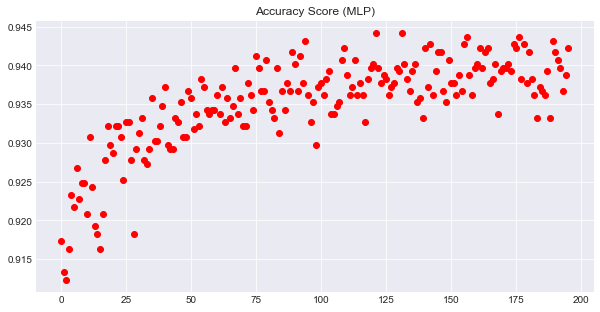

In [8]:
plt.figure(figsize = (10,5))
plt.plot(nn_acc_list, 'ro')
plt.title("Accuracy Score (MLP)")

Interesting, so our peak predictive score is just over 94.5%. Quite good compared to our benchmark of ~88%. Almost regardless of the NN architecture, it performed better than LDA. Let's try some other algorithms. 

#### Try our Bagging Classifier

In [9]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators = 100, random_state  =42)
bag.fit(X_train, y_train)
y_hat = bag.predict(X_test)
accuracy_score(y_test, y_hat)

0.8933731938216243

89% is barely better than our LDA benchmark, but nothing close to our peak NN. Not to mention, computational more expensive than our previous attempts. 

#### Maybe Decision Tree Classifier might be better?

In [10]:
from sklearn.tree import DecisionTreeClassifier
DT_acc = []

for i in range(2,14):
    dti = DecisionTreeClassifier(max_depth=i)
    dti.fit(X_train, y_train)
    yi_pred = dti.predict(X_test)
    print("depth:",i,',',"acc_score:", accuracy_score(y_test, yi_pred))
    DT_acc.append(accuracy_score(y_test, yi_pred))

depth: 2 , acc_score: 0.4175386148480319
depth: 3 , acc_score: 0.5814648729446936
depth: 4 , acc_score: 0.7179870453413054
depth: 5 , acc_score: 0.763328350772297
depth: 6 , acc_score: 0.7952167414050823
depth: 7 , acc_score: 0.8146487294469357
depth: 8 , acc_score: 0.8340807174887892
depth: 9 , acc_score: 0.8295964125560538
depth: 10 , acc_score: 0.8285999003487793
depth: 11 , acc_score: 0.8305929247633284
depth: 12 , acc_score: 0.8285999003487793
depth: 13 , acc_score: 0.8305929247633284


Text(0.5,1,'Accuracy Score (Decision Tree)')

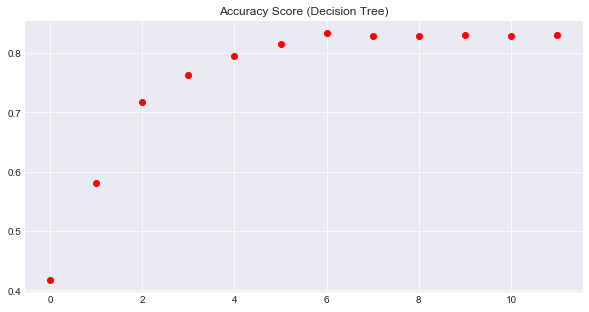

In [11]:
plt.figure(figsize = (10,5))
plt.plot(DT_acc, 'ro')
plt.title("Accuracy Score (Decision Tree)")

Seems like for Decision Tree Classifier, a depth of 6 or more has little effect on accuracy gains.
Unfortunately, an accuracy score of ~0.83 is just not good enough.

#### Next lets try SVM using Support Vector Classifier

In [12]:
from sklearn.svm import SVC
svm_acc = []
for i in range(1,10):
    sv = SVC(C=i)
    sv.fit(X_train,y_train)
    print(i, accuracy_score(sv.predict(X_test), y_test))
    svm_acc.append(accuracy_score(sv.predict(X_test), y_test))

1 0.9422022919780767
2 0.9466865969108121
3 0.9496761335326358
4 0.9506726457399103
5 0.9516691579471849
6 0.9506726457399103
7 0.9506726457399103
8 0.9496761335326358
9 0.9496761335326358


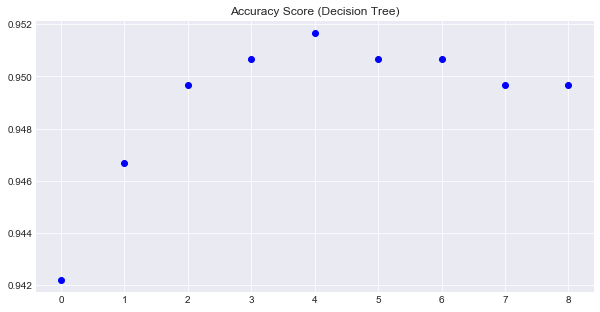

In [13]:
plt.figure(figsize = (10,5))
plt.plot(svm_acc, 'bo')
plt.title("Accuracy Score (Decision Tree)")
plt.show()

With little effort, svm has out performed all our previous algorithms and broken the accuracy score barrier of 95%.
Let's try to optimize the SVM method to see what we can achieve. 

In [14]:
svc_acc = []
for i in range(1,10):
    for j in range(2,8):
        sv = SVC(C=i, kernel = 'poly', degree = j)
        sv.fit(X_train,y_train)
        print(i,j, accuracy_score(sv.predict(X_test), y_test))
        svc_acc.append(accuracy_score(sv.predict(X_test), y_test))


1 2 0.942700548081714
1 3 0.9466865969108121
1 4 0.9446935724962631
1 5 0.9357249626307922
1 6 0.9152964623816642
1 7 0.8888888888888888
2 2 0.9466865969108121
2 3 0.9506726457399103
2 4 0.9506726457399103
2 5 0.9466865969108121
2 6 0.935226706527155
2 7 0.9192825112107623
3 2 0.9491778774289985
3 3 0.9531639262580966
3 4 0.9531639262580966
3 5 0.9516691579471849
3 6 0.9451918285999004
3 7 0.9307424015944196
4 2 0.9506726457399103
4 3 0.9546586945690084
4 4 0.953662182361734
4 5 0.9521674140508222
4 6 0.9476831091180867
4 7 0.9377179870453413
5 2 0.9511709018435476
5 3 0.9531639262580966
5 4 0.9541604384653712
5 5 0.9531639262580966
5 6 0.9496761335326358
5 7 0.9397110114598903
6 2 0.9506726457399103
6 3 0.9541604384653712
6 4 0.9541604384653712
6 5 0.953662182361734
6 6 0.9496761335326358
6 7 0.9422022919780767
7 2 0.9511709018435476
7 3 0.9526656701544594
7 4 0.9541604384653712
7 5 0.953662182361734
7 6 0.9501743896362731
7 7 0.9441953163926258
8 2 0.9501743896362731
8 3 0.9531639262

Text(0.5,1,'Accuracy Score (SVC)')

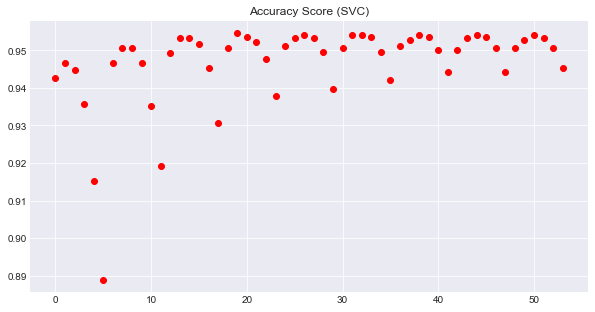

In [15]:
plt.figure(figsize = (10,5))
plt.plot(svc_acc, 'ro')
plt.title("Accuracy Score (SVC)")

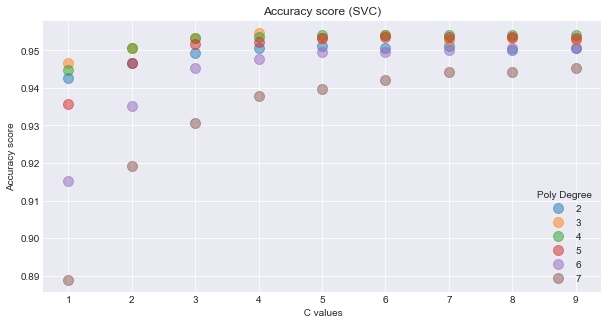

In [16]:
plt.figure(figsize = (10,5))
poly_deg = list(range(1,10))
for i in range(6):
    plt.plot(poly_deg,svc_acc[i::6],'o', label = str(i+2), markersize = '10', alpha = 0.5)
plt.title("Accuracy score (SVC)")
plt.legend(title = 'Poly Degree')
plt.ylabel('Accuracy score')
plt.xlabel(' C values')
plt.show()

When we set the polynomial degree greater than 5 it seems we are overfitting, lets focus on the ones less than 5.

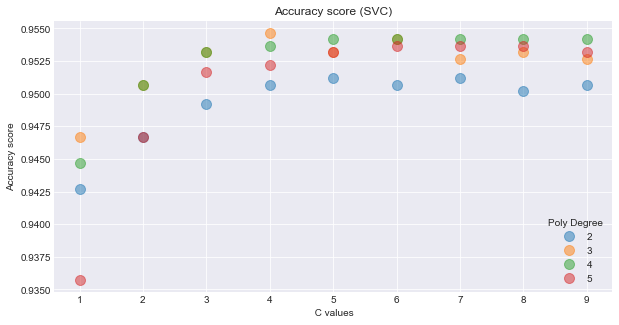

In [17]:
plt.figure(figsize = (10,5))
poly_deg = list(range(1,10))
for i in range(4):
    plt.plot(poly_deg,svc_acc[i::6],'o', label = str(i+2), markersize = '10', alpha = 0.5)
plt.title("Accuracy score (SVC)")
plt.legend(title = 'Poly Degree', loc = 4)
plt.ylabel('Accuracy score')
plt.xlabel(' C values')
plt.show()

#### It would seem like SVC performs the best, and optimizing it with a C-value = 4 and Polynomial degree = 3, gives the best results. 

In [18]:
print("best accuracy score:",max(svc_acc))

best accuracy score: 0.9546586945690084


#### SVMs produced a prediction's with 95.46% accuracy, as compared to the next best, being Neural Networks at 94.5%. Almost a 1% gain!

I tried other methods, one being PCA, then concatenating that data to the original data, producing more features, but ultimately all resulted in lower accuracy scores on the test data set. 

#### In conclusion, for this zip data set, SVM/SVC seems to be the most powerful method for prediction. 

